In [1]:
from torch.distributions.uniform import Uniform
from torch.distributions.beta import Beta

from main import train_and_eval, train_loader, test_loader

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import torch

### Visualize training and testing data

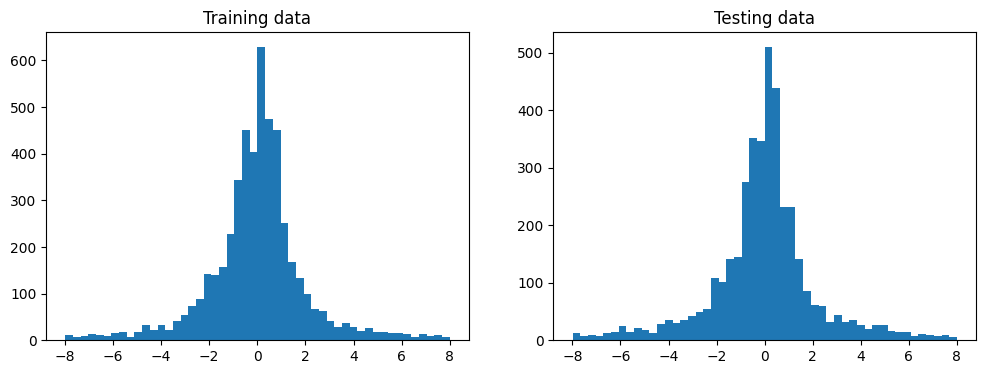

In [2]:
_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].hist(train_loader.dataset.array, bins=50)
_ = axes[1].hist(test_loader.dataset.array, bins=50)
_ = axes[0].set_title('Training data')
_ = axes[1].set_title('Testing data')

### Train the flow model

In [3]:
target_distribution = Uniform(0.0, 1.0)
flow, train_losses, test_losses = train_and_eval(100, 5e-3, train_loader, test_loader, target_distribution)

ValueError: Expected value argument (Tensor of shape (128,)) to be within the support (Interval(lower_bound=0.0, upper_bound=1.0)) of the distribution Uniform(low: 0.0, high: 1.0), but found invalid values:
tensor([5.6954e-01, 9.6857e-01, 6.8751e-01, 7.9346e-01, 8.8415e-01, 2.8177e-01,
        2.6262e-01, 7.5512e-01, 9.9422e-01, 3.7971e-01, 1.6072e-01, 3.8397e-01,
        7.3888e-01, 1.1617e-01, 9.7846e-01, 8.8354e-02, 9.9060e-01, 6.8351e-01,
        7.0263e-01, 2.4901e-01, 6.8916e-01, 5.2471e-01, 1.6134e-04, 3.3646e-01,
        4.8085e-01, 6.7762e-01, 1.7610e-01, 1.0863e-01, 6.6224e-01, 9.9848e-01,
        9.9876e-01, 8.2667e-01, 4.3521e-01, 9.7917e-01, 9.2178e-01, 2.9732e-01,
        7.3207e-01, 8.7422e-01, 5.7510e-01, 9.9935e-01, 1.1865e-11, 2.4094e-02,
        1.8840e-02, 9.3682e-01, 6.2492e-01, 5.9184e-01, 3.0700e-04, 6.1421e-01,
        3.0770e-01, 6.4425e-01, 9.5187e-01, 7.4258e-01, 6.1393e-01, 6.8814e-01,
        7.6233e-01, 4.3521e-01, 4.2616e-01, 7.8635e-01, 9.9870e-01, 5.1327e-01,
        1.0000e+00, 6.2216e-01, 7.9585e-01, 3.7792e-01, 9.6915e-01, 8.9474e-01,
        7.8682e-01, 6.6034e-01, 4.7518e-01, 4.0303e-01, 8.0815e-01, 7.8146e-02,
        6.5461e-01, 3.6134e-01, 9.2519e-01, 5.9162e-01, 4.5198e-01, 2.8461e-01,
        8.1721e-01, 2.1579e-01, 6.2216e-01, 1.0000e+00, 6.5573e-01, 1.2891e-01,
        7.4133e-01, 5.7923e-01, 5.2380e-02, 4.5629e-01, 7.3590e-01, 6.2216e-01,
        5.8914e-02, 9.6469e-01, 9.9871e-01, 1.1015e-01, 5.7684e-01, 6.0194e-01,
        7.4965e-01, 8.5832e-01, 9.8725e-01, 6.8351e-01, 4.5995e-04, 5.4216e-01,
        4.5305e-01, 4.5644e-01, 1.1015e-01, 7.2539e-01, 9.8709e-01, 7.9585e-01,
        2.5678e-10, 4.4359e-01, 7.8635e-01, 6.8751e-01, 8.6315e-01, 5.9104e-01,
        6.1292e-01, 7.7109e-01, 6.7762e-01, 4.7815e-01, 3.5061e-02, 1.5579e-02,
        9.9713e-01, 7.7702e-01, 9.9751e-01, 8.9411e-03, 6.6439e-01, 1.1615e-01,
        7.9320e-01, 7.9428e-01], dtype=torch.float64, grad_fn=<SumBackward1>)

### View the losses

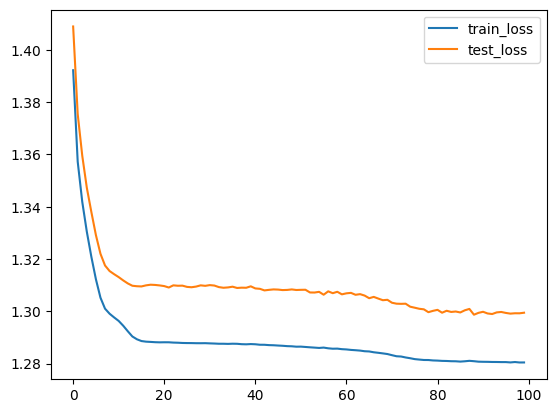

In [ ]:
_ = plt.plot(train_losses, label='train_loss')
_ = plt.plot(test_losses, label='test_loss')
plt.legend()

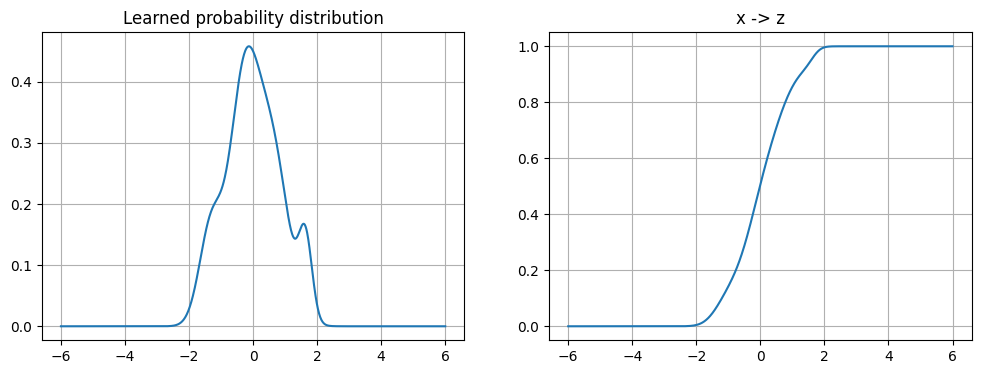

In [ ]:
x = np.linspace(-6,6,1000)
with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(x))
    px = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()
    
_, axes = plt.subplots(1,2, figsize=(12,4))
_ = axes[0].grid(), axes[1].grid()
_ = axes[0].plot(x,px)
_ = axes[0].set_title('Learned probability distribution')

_ = axes[1].plot(x,z)
_ = axes[1].set_title('x -> z')

### Empirical distribution of `z`

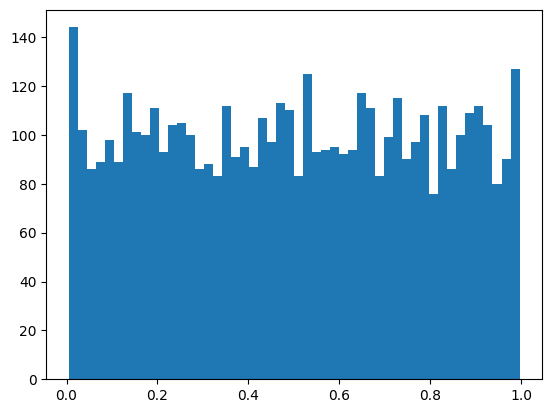

In [ ]:
with torch.no_grad():
    z, dz_by_dx = flow(torch.FloatTensor(train_loader.dataset.array))
    px = (target_distribution.log_prob(z) + dz_by_dx.log()).exp().cpu().numpy()
    
_ = plt.hist(z, bins=50)